In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
import matplotlib.colors as cl
import cartopy.crs as ccrs
import cartopy as cart
from cartopy.util import add_cyclic_point
from copy import copy  
import pandas as pd
import functools
import os

In [28]:
#Functions
#1. Read in Variables

#Create Data set
fields = ["H2OSOI", "TSOI", "SOILICE",  "SNOWDP", "QDRAI_PERCH","FROST_TABLE","ZWT_PERCH",
          "ZWT",  "H2OSNO", "SNOWDP", "TSOI_10CM",  "TG", "QDRAI", "QDRAI_XS", "QICE", "QICE_MELT",
          "TBOT","TH2OSFC","THBOT","TOTEXICE_VOL","TOTSOILICE","TOTSOILLIQ","lon", "lat", "SNOW_DEPTH", "SNOW", 
          "SNOWLIQ", "FSAT", "QH2OSFC", "QOVER",  "SOILLIQ" , "TWS", "H2OSFC","FGEV" ,"FH2OSFC_NOSNOW",
          "QFLX_LIQ_GRND", "QFLX_SNOW_GRND", "QFLX_EVAP_VEG", "QSOIL", "QOVER", "QRGWL", "QSNWCPICE",
          "SNOWLIQ", "FSNO", "FSNO_EFF", "FH2OSFC",  "FSAT", "H2OSFC", "QH2OSFC", "EXCESS_ICE", "SUBSIDENCE", 
           "TG", "TSA","SUBSACC",
           "RAIN", "SNOW","QFLOOD","QIRRIG_FROM_SURFACE",'RAIN_FROM_ATM',
           "QFLX_EVAP_TOT", 'QOVER','QRGWL','QDRAI','QDRAI_PERCH',
           "NEE", "NEP", "NPP", "GPP", "TWS", "TLAI",
           "TOTCOLC", "TOTECOSYSC", "TOTSOMC", "TOTVEGC",
           "TOTCOLCH4", "CH4PROD", "CH4_SURF_DIFF_SAT", "CH4_SURF_DIFF_UNSAT", "CONC_CH4_SAT", "CONC_CH4_UNSAT",
"FCH4TOCO2", "PCH4", "PCO2", "ZWT_CH4_UNSAT"
]#, "PCT_SAND", "PCT_CLAY"


#"QTOPSOIL",
def preprocess (ds, fields):
 "Selescts varaibales, drops lndgrid"
 return ds[fields]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')




################################################################################################

path1="/cluster/work/users/estherbe/archive/0711_Iskoras_spin_t7/lnd/hist"
path2="/cluster/work/users/estherbe/archive/0717_Test_trans_t1/lnd/hist"
path3="/cluster/work/users/estherbe/archive/0717_Is_SpinBC/lnd/hist"

path6="/cluster/work/users/estherbe/archive/0731_iskoras_spinBC_new/lnd/hist"

path2="/cluster/work/users/estherbe/archive/0818_Iskoras_trans_ct2/lnd/hist"
path2="/cluster/work/users/estherbe/archive/0808_Iskoras_trans_new/lnd/hist"

#path2="/cluster/work/users/estherbe/archive/0729_Is_trans_BC/lnd/hist"
path4="/cluster/work/users/estherbe/archive/0730_Iskoras_trans_BC_t4/lnd/hist"
path1="/cluster/work/users/estherbe/archive/0806_Iskoras_spin/lnd/hist"
path5="/cluster/work/users/estherbe/archive/0731_iskoras_spinBC_new2/lnd/hist"
path6="/cluster/work/users/estherbe/archive/0808_Is_spin_acBC/lnd/hist"
#path3="/cluster/work/users/estherbe/archive/0808_spin_BC_test/lnd/hist"

path2="/cluster/work/users/estherbe/archive/0810_IstransB_actT2/lnd/hist"

file= os.listdir(path1)
file_name= sorted(file)
full_paths1=[os.path.join(path1,fname) for fname in file_name]

file= os.listdir(path2)
file_name= sorted(file)
full_paths2=[os.path.join(path2,fname) for fname in file_name]

file= os.listdir(path3)
file_name= sorted(file)
full_paths3=[os.path.join(path3,fname) for fname in file_name]


file= os.listdir(path4)
file_name= sorted(file)
full_paths4=[os.path.join(path4,fname) for fname in file_name]

file= os.listdir(path5)
file_name= sorted(file)
full_paths5=[os.path.join(path5,fname) for fname in file_name]

file= os.listdir(path6)
file_name= sorted(file)
full_paths6=[os.path.join(path6,fname) for fname in file_name]



In [29]:

#ds_BC_new= xr.open_mfdataset(full_paths5, decode_times=True,           #data with lateral heat flux and no snow redistribution
 #  preprocess=functools.partial(preprocess, fields=fields))

ds_trans= xr.open_mfdataset(full_paths2, decode_times=True,           #data with lateral heat flux and no snow redistribution
   preprocess=functools.partial(preprocess, fields=fields))

In [30]:
#ds_sp_BC= xr.open_mfdataset(full_paths3, decode_times=True,           #data with lateral heat flux and no snow redistribution
 #  preprocess=functools.partial(preprocess, fields=fields))

#ds_trans= xr.open_mfdataset(full_paths2, decode_times=True,           #data with lateral heat flux and no snow redistribution
 #  preprocess=functools.partial(preprocess, fields=fields))

ds_sp= xr.open_mfdataset(full_paths1, decode_times=True,           #data with lateral heat flux and no snow redistribution
   preprocess=functools.partial(preprocess, fields=fields))

#ds_sp_new= xr.open_mfdataset(full_paths6, decode_times=True,           #data with lateral heat flux and no snow redistribution
 #  preprocess=functools.partial(preprocess, fields=fields))

ds_BC_new= xr.open_mfdataset(full_paths5, decode_times=True,           #data with lateral heat flux and no snow redistribution
   preprocess=functools.partial(preprocess, fields=fields))

ds_BC_new2= xr.open_mfdataset(full_paths6, decode_times=True,           #data with lateral heat flux and no snow redistribution
   preprocess=functools.partial(preprocess, fields=fields))
 
#ds=xr.open_mfdataset(full_paths1, decode_times=True)

In [35]:
#ds_sp_BC["time"]=pd.date_range("1901-01-01", periods= 96, freq="M")

ds_sp["time"]=pd.date_range("1751-01-01", periods= 2400, freq="M")

#ds_sp_new["time"]=pd.date_range("1901-01-01", periods= 2400, freq="M")


ds_trans["time"]=pd.date_range("1751-01-01", periods= 96, freq="M")


ds_BC_new2["time"]=pd.date_range("1751-01-01", periods= 5496, freq="M")
ds_BC_new["time"]=pd.date_range("1751-01-01", periods= 5580, freq="M")

In [10]:
vars=["TOTVEGC", "TOTSOMC", "TOTCOLC", "TOTECOSYSC","TOTCOLCH4"]
#vars=[, "CH4PROD", "CONC_CH4_SAT", "CONC_CH4_UNSAT"]
ds_sp.TOTSOMC.values

array([[386.7283 , 506.9163 ],
       [386.7283 , 505.64026],
       [386.7283 , 505.04953],
       ...,
       [367.39294, 503.13776],
       [365.79752, 500.70758],
       [365.58105, 498.46075]], dtype=float32)

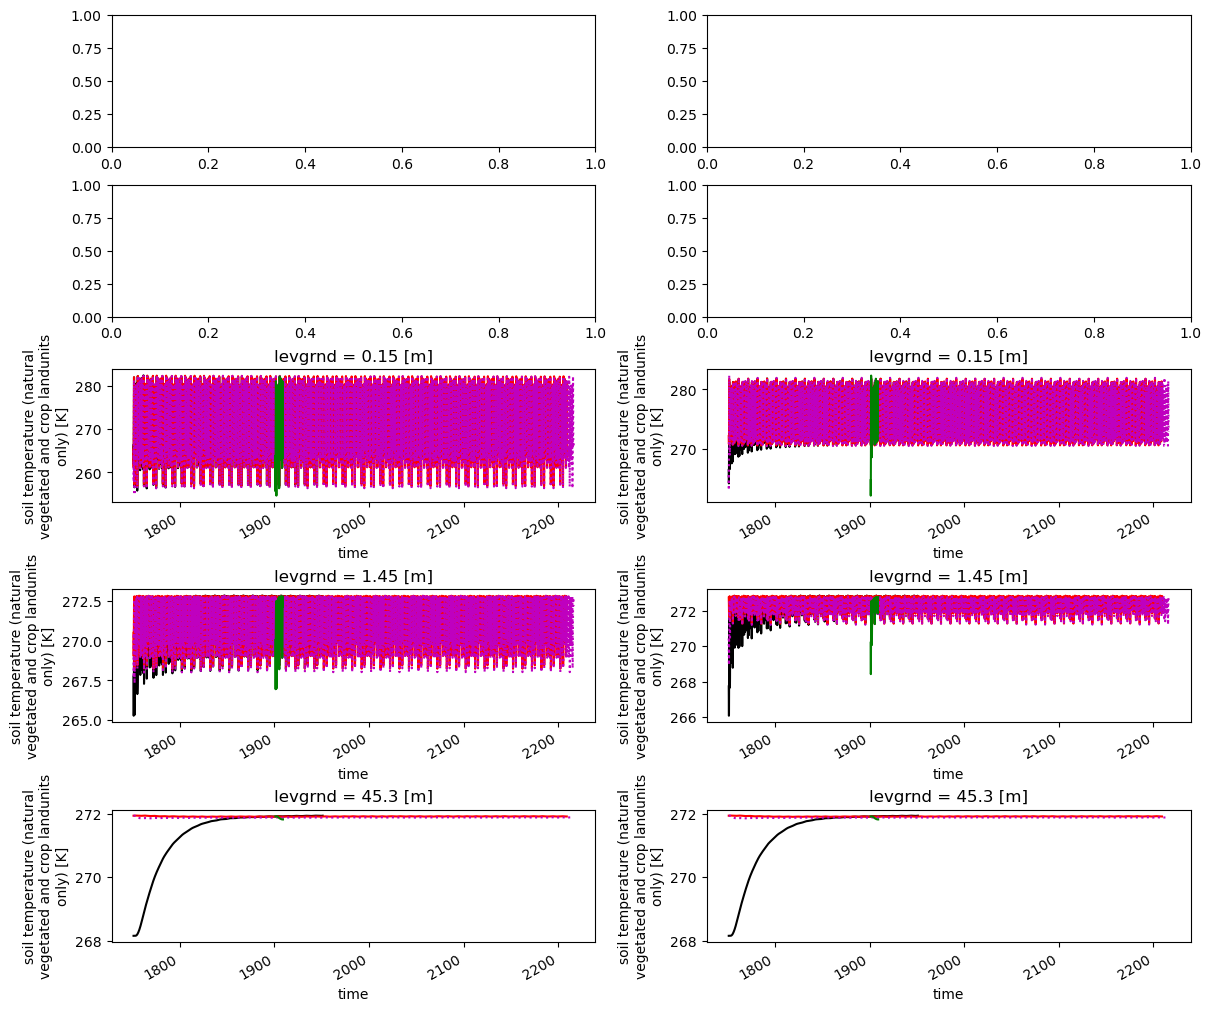

In [33]:
fig, axs= plt.subplots(5,2, layout="constrained", figsize=(12,10))


#for i in range (40,54):
 #ds_sp.TSOI[:,i,0].plot(x="time", ax=axs[0,0])
 #ds_sp.TSOI[:,i,1].plot(x="time", ax=axs[0,1])
 
#for i in range (40,54):
 #ds_trans.TSOI[:,i,0].plot(x="time", ax=axs[1,0])
 #ds_trans.TSOI[:,i,1].plot(x="time", ax=axs[1,1])
 #ds_BC_new2.TSOI[:,i,0].plot(x="time", ax=axs[1,0])
 #ds_BC_new2.TSOI[:,i,1].plot(x="time", ax=axs[1,1])
 
#for i in range (40,54):
# ds_sp_BC.TSOI[:,i,0].plot(x="time", ax=axs[2,0])
# ds_sp_BC.TSOI[:,i,1].plot(x="time", ax=axs[2,1])
 
#for i in range (40,54):
 #ds_sp_new.TSOI[:,i,0].plot(x="time", ax=axs[3,0])
 #ds_sp_new.TSOI[:,i,1].plot(x="time", ax=axs[3,1])
 
 
#for i in range (40,54):
 #ds_BC_new.TSOI[:,i,0].plot(x="time", ax=axs[3,0])
 #ds_BC_new.TSOI[:,i,1].plot(x="time", ax=axs[3,1])
 
 
#ds_sp_new.TSOI[:,53,0].plot(x="time", ax=axs[4,0], color="black")
#ds_sp_new.TSOI[:,53,1].plot(x="time", ax=axs[4,1], color="black")

ds_sp.TSOI[:,53,0].plot(x="time", ax=axs[4,0], color="black")
ds_sp.TSOI[:,53,1].plot(x="time", ax=axs[4,1], color="black")


#ds_sp_BC.TSOI[:,53,0].plot(x="time", ax=axs[4,0], color="blue")
#ds_sp_BC.TSOI[:,53,1].plot(x="time", ax=axs[4,1], color="blue") 
ds_BC_new2.TSOI[:,53,0].plot(x="time", ax=axs[4,0], color="r")
ds_BC_new2.TSOI[:,53,1].plot(x="time", ax=axs[4,1], color="r")
 
ds_BC_new.TSOI[:,53,0].plot(x="time", ax=axs[4,0], color="m", linestyle="dotted")
ds_BC_new.TSOI[:,53,1].plot(x="time", ax=axs[4,1], color="m", linestyle="dotted")

ds_trans.TSOI[:,53,0].plot(x="time", ax=axs[4,0], color="g")
ds_trans.TSOI[:,53,1].plot(x="time", ax=axs[4,1], color="g")

#################################################################################33

ds_sp.TSOI[:,20,0].plot(x="time", ax=axs[3,0], color="black")
ds_sp.TSOI[:,20,1].plot(x="time", ax=axs[3,1], color="black")

ds_BC_new2.TSOI[:,20,0].plot(x="time", ax=axs[3,0], color="r")
ds_BC_new2.TSOI[:,20,1].plot(x="time", ax=axs[3,1], color="r")
 
ds_BC_new.TSOI[:,20,0].plot(x="time", ax=axs[3,0], color="m", linestyle="dotted")
ds_BC_new.TSOI[:,20,1].plot(x="time", ax=axs[3,1], color="m", linestyle="dotted")

ds_trans.TSOI[:,20,0].plot(x="time", ax=axs[3,0], color="g")
ds_trans.TSOI[:,20,1].plot(x="time", ax=axs[3,1], color="g")

#*****************************************************************************'

ds_sp.TSOI[:,10,0].plot(x="time", ax=axs[2,0], color="black")
ds_sp.TSOI[:,10,1].plot(x="time", ax=axs[2,1], color="black")

ds_BC_new2.TSOI[:,10,0].plot(x="time", ax=axs[2,0], color="r")
ds_BC_new2.TSOI[:,10,1].plot(x="time", ax=axs[2,1], color="r")
 
ds_BC_new.TSOI[:,10,0].plot(x="time", ax=axs[2,0], color="m", linestyle="dotted")
ds_BC_new.TSOI[:,10,1].plot(x="time", ax=axs[2,1], color="m", linestyle="dotted")


ds_trans.TSOI[:,10,0].plot(x="time", ax=axs[2,0], color="g")
ds_trans.TSOI[:,10,1].plot(x="time", ax=axs[2,1], color="g")


#for i in range(30,49):
 #ds_sp.H2OSOI[:,i,0].plot(x="time", ax=axs[2,0])
 #ds_sp.H2OSOI[:,i,1].plot(x="time", ax=axs[2,1])
 
#for i in range(30,49):
 #ds_trans.H2OSOI[:,i,0].plot(x="time", ax=axs[3,0])
 #ds_trans.H2OSOI[:,i,1].plot(x="time", ax=axs[3,1])
 
#for i in range(0,49):
#ds.EXCESS_ICE[:,:,0].plot(x="time", ax=axs[2,0])
#ds.EXCESS_ICE[:,:,1].plot(x="time", ax=axs[2,1])

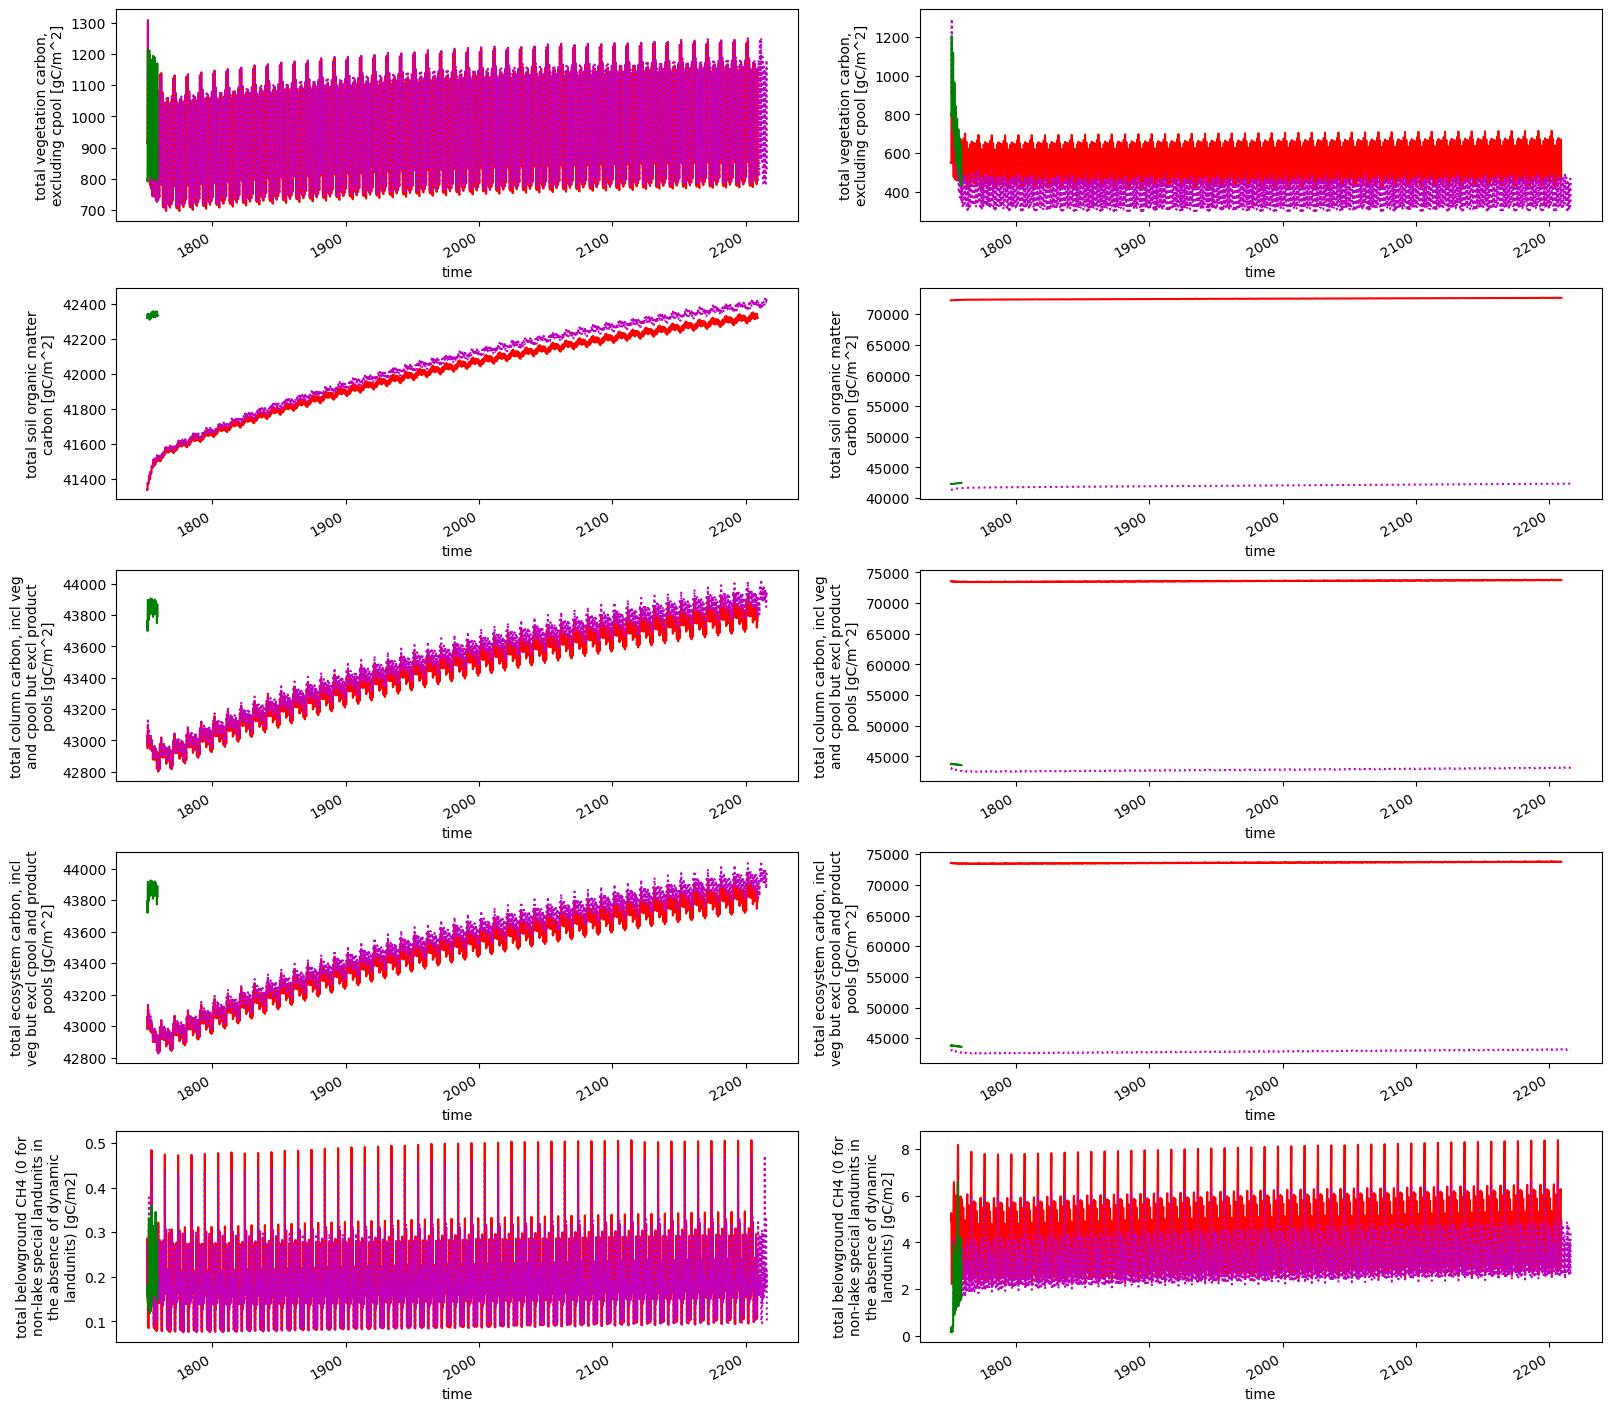

In [37]:
vars=["TOTVEGC", "TOTSOMC", "TOTCOLC", "TOTECOSYSC","TOTCOLCH4"]
#vars=[, "CH4PROD", "CONC_CH4_SAT", "CONC_CH4_UNSAT"]

#ds[vars[3]]

fig, axs= plt.subplots(5,2, layout="constrained", figsize=(16,14))


for i in range(0,5):
    
 #ds_sp[vars[i]][:,0].plot(color="black", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 #ds_sp[vars[i]][:,1].plot(color="black", x="time", ax= axs[i,1])#, linestyle="dotted")
 

 
 #ds_sp_new[vars[i]][:,0].plot(color="m", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 #ds_sp_new[vars[i]][:,1].plot(color="m", x="time", ax= axs[i,1], linestyle="dotted")
 

 
 ds_BC_new2[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4")
 ds_BC_new2[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1])
 
 #ds_sp_BC[vars[i]][:,0].plot(color="blue", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 #ds_sp_BC[vars[i]][:,1].plot(color="blue", x="time", ax= axs[i,1])#, linestyle="dotted") 
 ds_BC_new[vars[i]][:,0].plot(color="m", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 ds_BC_new[vars[i]][:,1].plot(color="m", x="time", ax= axs[i,1], linestyle="dotted")
 ds_trans[vars[i]][:,0].plot(color="g", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 ds_trans[vars[i]][:,1].plot(color="g", x="time", ax= axs[i,1])#, linestyle="dotted")

# ds.NEP[:,0].plot(x="time")
#ds.NEP[:,1].plot(x="time", color="r")

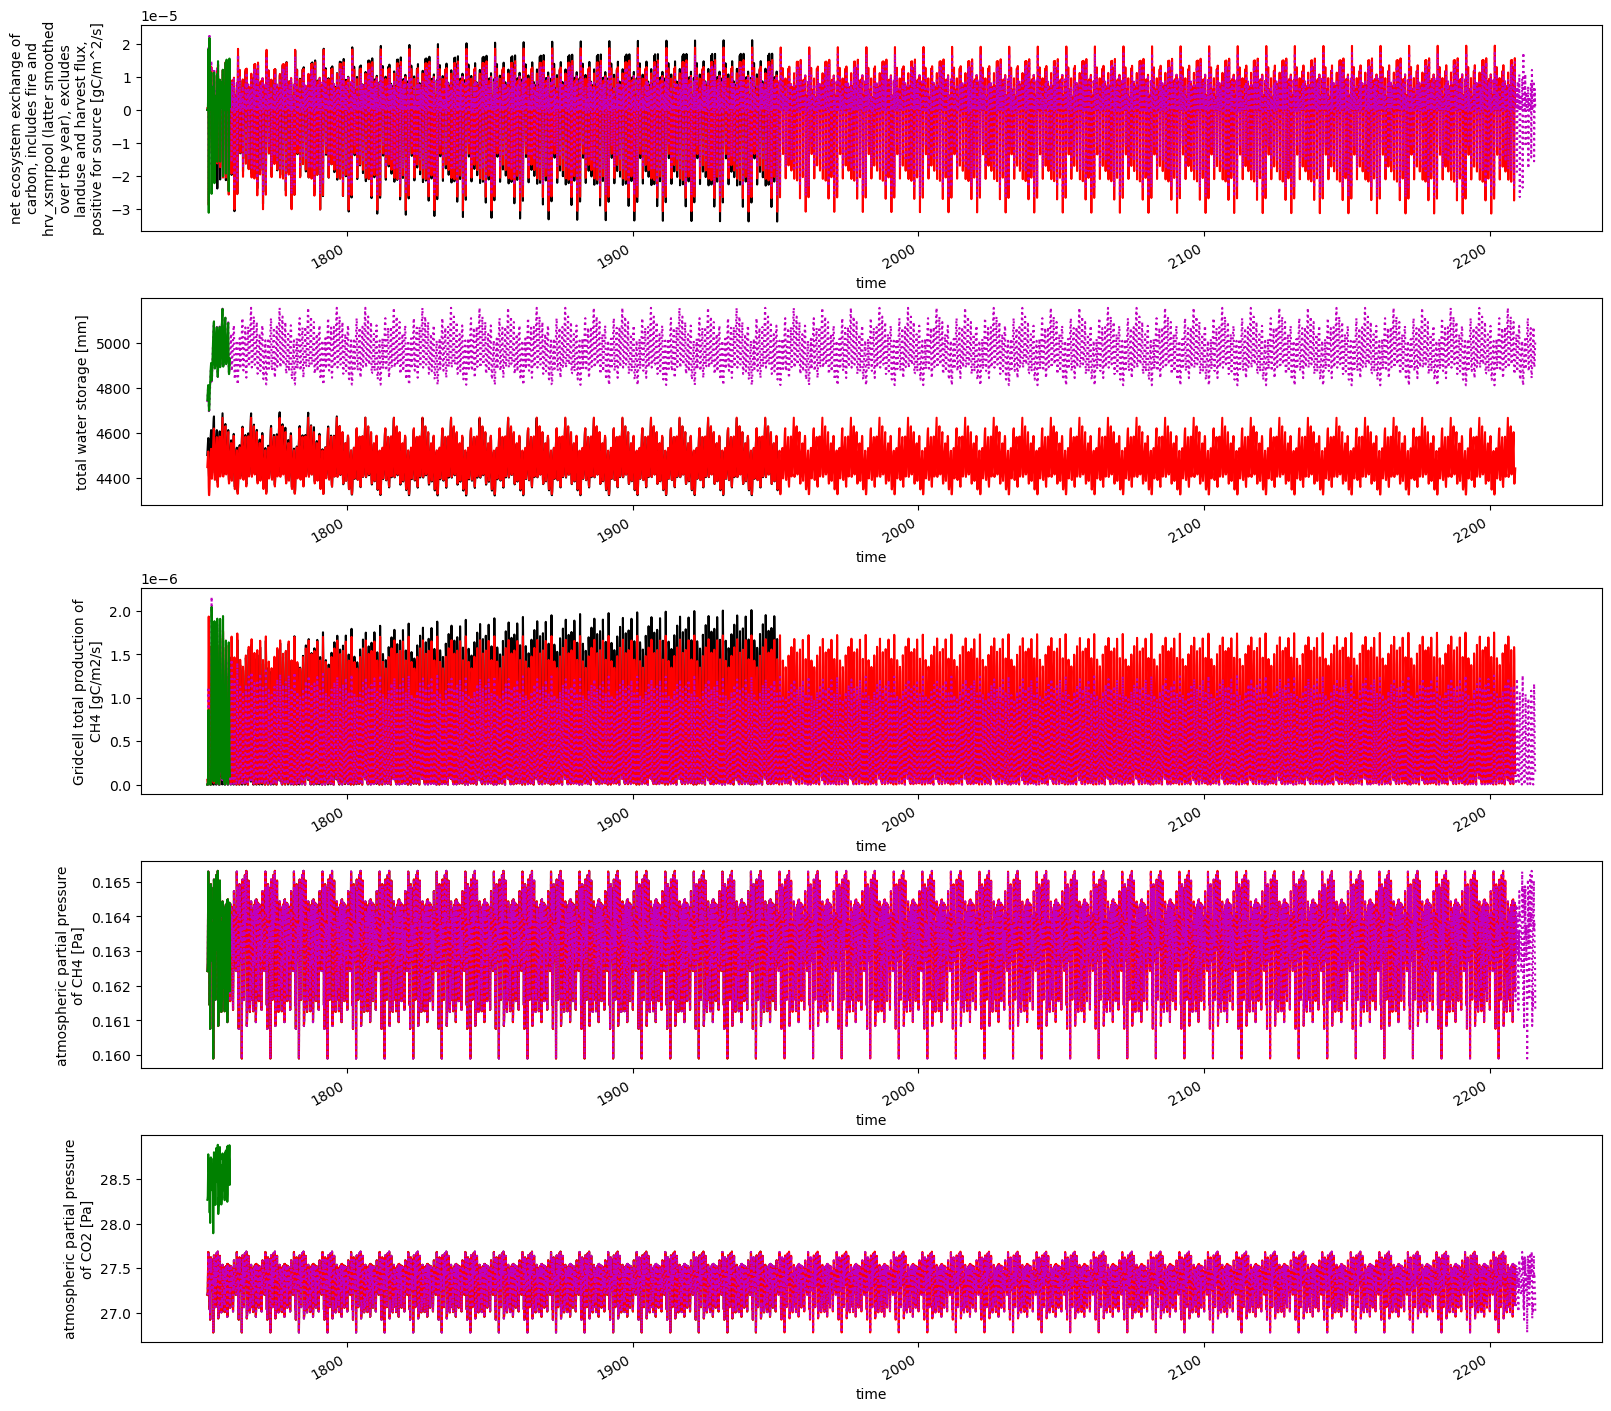

In [38]:
vars=["NEE","TWS","CH4PROD",  "PCH4", "PCO2"]


fig, axs= plt.subplots(5,1, layout="constrained", figsize=(16,14))


for i in range(0,5):
 ds_sp[vars[i]][:,0].plot(color="black", x="time", ax= axs[i], label="pc=0.4")#,linestyle="dotted")
 
 #ds_sp_new[vars[i]][:,0].plot(color="r", x="time", ax= axs[i], label="pc=0.4",linestyle="dotted")

 ds_BC_new2[vars[i]][:,0].plot(color="r", x="time", ax= axs[i], label="pc=0.4")#,linestyle="dotted")
 ds_BC_new[vars[i]][:,0].plot(color="m", x="time", ax= axs[i], label="pc=0.4",linestyle="dotted")
 #ds_sp_BC[vars[i]][:,0].plot(color="blue", x="time", ax= axs[i])
 ds_trans[vars[i]][:,0].plot(color="g", x="time", ax= axs[i], label="pc=0.4")#,linestyle="dotted")
#ds[vars[0]]

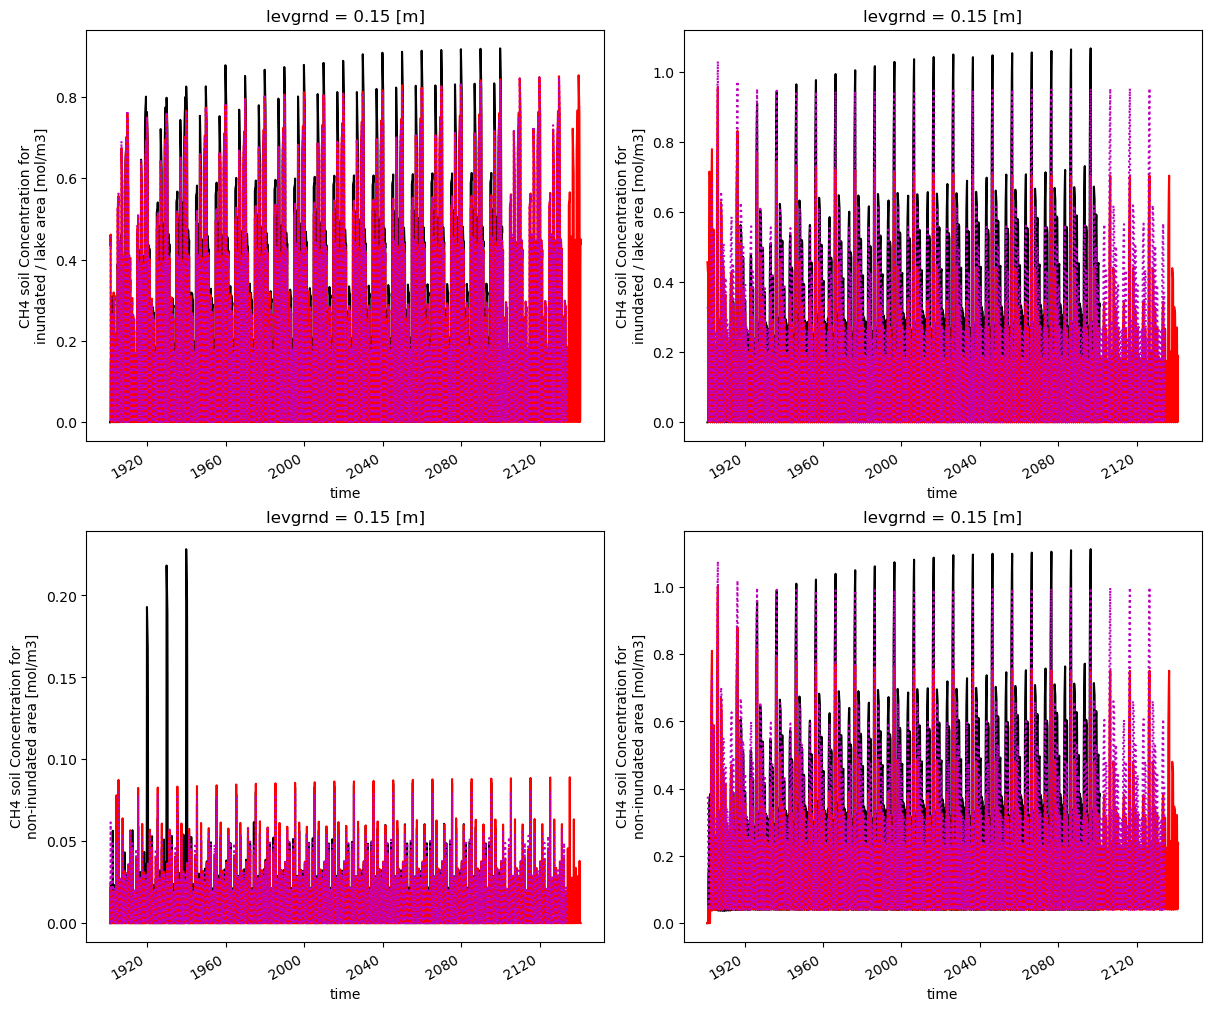

In [17]:
vars=[ "CONC_CH4_SAT", "CONC_CH4_UNSAT"]

fig, axs= plt.subplots(2,2, layout="constrained", figsize=(12,10))
n=10
for i in range (0,2):

 ds_sp[vars[i]][:,n,0].plot(x="time", ax=axs[i,0], color="black")
 ds_sp[vars[i]][:,n,1].plot(x="time", ax=axs[i,1], color="black")

 #ds_sp_BC[vars[i]][:,n,0].plot(x="time", ax=axs[i,0], color="blue")
 #ds_sp_BC[vars[i]][:,n,1].plot(x="time", ax=axs[i,1], color="blue")
 
 ds_BC_new[vars[i]][:,n,0].plot(x="time", ax=axs[i,0], color="r")#, linestyle="dotted")
 ds_BC_new[vars[i]][:,n,1].plot(x="time", ax=axs[i,1], color="r")#, linestyle="dotted")

 ds_BC_new2[vars[i]][:,n,0].plot(x="time", ax=axs[i,0], color="m", linestyle="dotted")
 ds_BC_new2[vars[i]][:,n,1].plot(x="time", ax=axs[i,1], color="m", linestyle="dotted")
 
 #ds_trans[vars[i]][:,n,1].plot(x="time", ax=axs[i,1], color="g", linestyle="dotted")



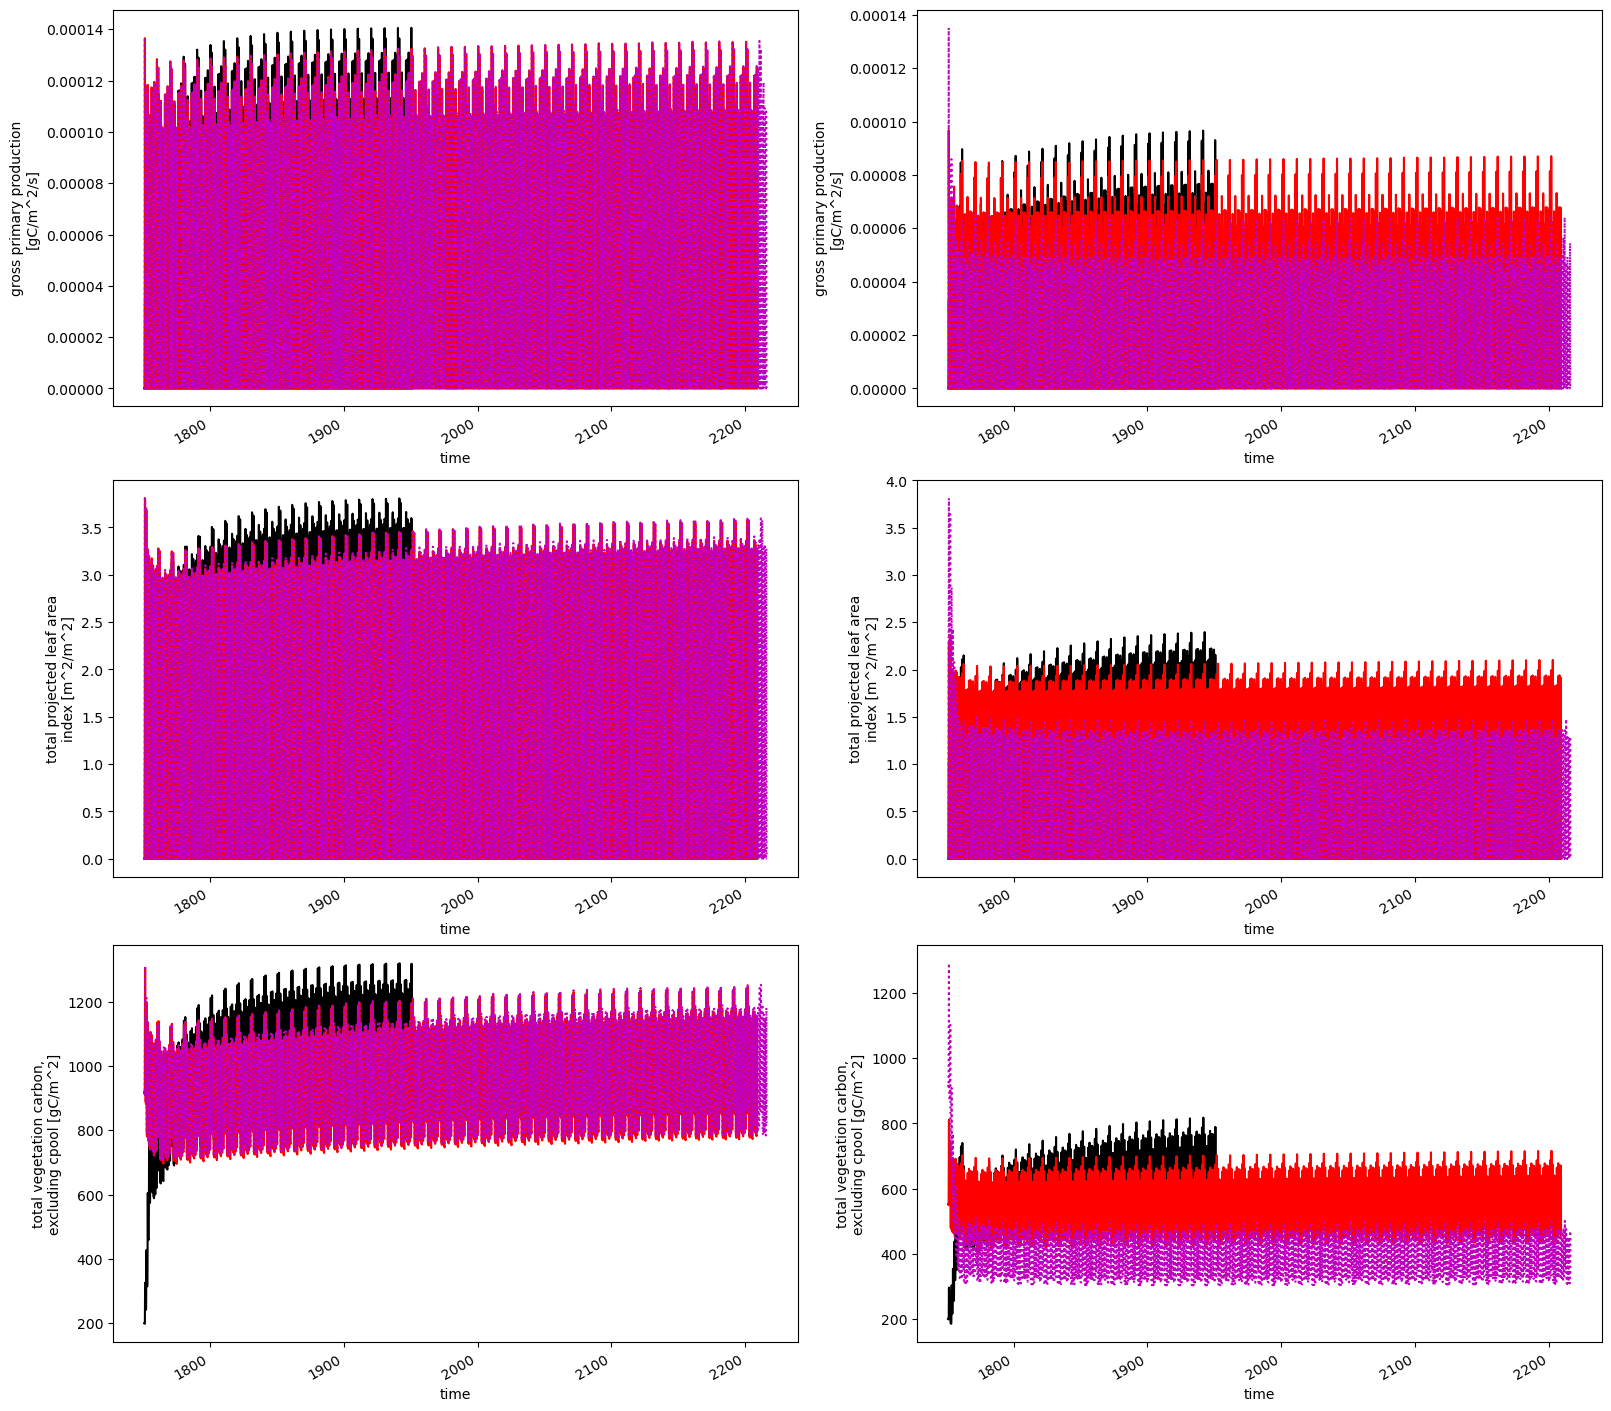

In [14]:
vars=["GPP", "TLAI", "TOTVEGC"]


fig, axs= plt.subplots(3,2, layout="constrained", figsize=(16,14))


for i in range(0,3):
 ds_sp[vars[i]][:,0].plot(color="black", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 ds_sp[vars[i]][:,1].plot(color="black", x="time", ax= axs[i,1])#, linestyle="dotted")
 
 #ds_sp_new[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 #ds_sp_new[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1], linestyle="dotted")
 

 
 #ds_trans[vars[i]][:,0].plot(color="g", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 #ds_trans[vars[i]][:,1].plot(color="g", x="time", ax= axs[i,1])#, linestyle="dotted")
 
 ds_BC_new2[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 ds_BC_new2[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1], label="pc=0.4")#,linestyle="dotted")
 #ds_sp_BC[vars[i]][:,0].plot(color="blue", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 #ds_sp_BC[vars[i]][:,1].plot(color="blue", x="time", ax= axs[i,1], linestyle="dotted") 
 ds_BC_new[vars[i]][:,0].plot(color="m", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 ds_BC_new[vars[i]][:,1].plot(color="m", x="time", ax= axs[i,1], label="pc=0.4",linestyle="dotted")

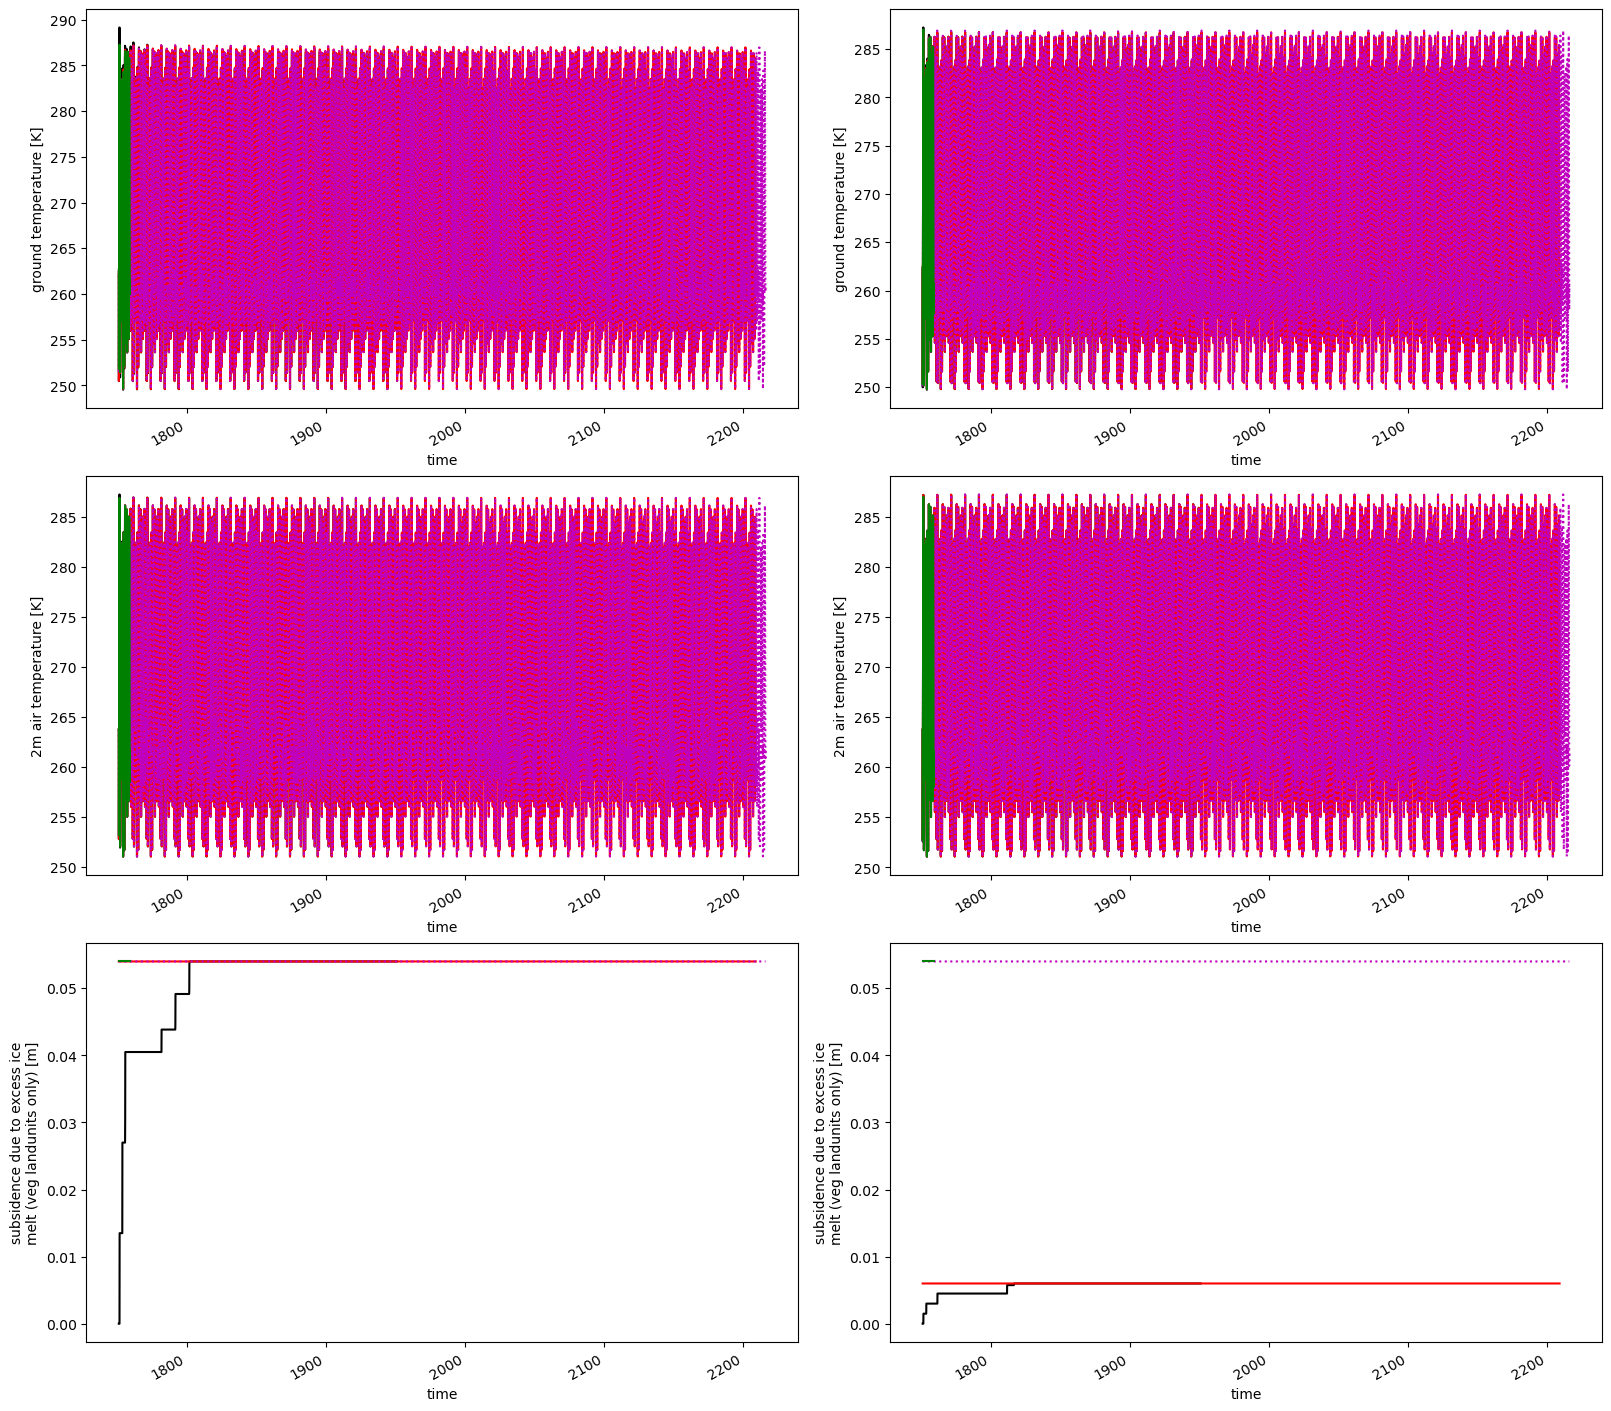

In [39]:
vars=["TG", "TSA", "SUBSACC"]

fig, axs= plt.subplots(3,2, layout="constrained", figsize=(16,14))


for i in range(0,3):
 ds_sp[vars[i]][:,0].plot(color="black", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 ds_sp[vars[i]][:,1].plot(color="black", x="time", ax= axs[i,1])#, linestyle="dotted")
 
 #ds_sp_new[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 #ds_sp_new[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1], linestyle="dotted")

 #ds_sp_BC[vars[i]][:,0].plot(color="blue", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 #ds_sp_BC[vars[i]][:,1].plot(color="blue", x="time", ax= axs[i,1], linestyle="dotted")

 ds_BC_new2[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 ds_BC_new2[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1], label="pc=0.4")#,linestyle="dotted")
 
 ds_BC_new[vars[i]][:,0].plot(color="m", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
 ds_BC_new[vars[i]][:,1].plot(color="m", x="time", ax= axs[i,1], label="pc=0.4",linestyle="dotted")
 ds_trans[vars[i]][:,0].plot(color="g", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
 ds_trans[vars[i]][:,1].plot(color="g", x="time", ax= axs[i,1])#, linestyle="dotted")

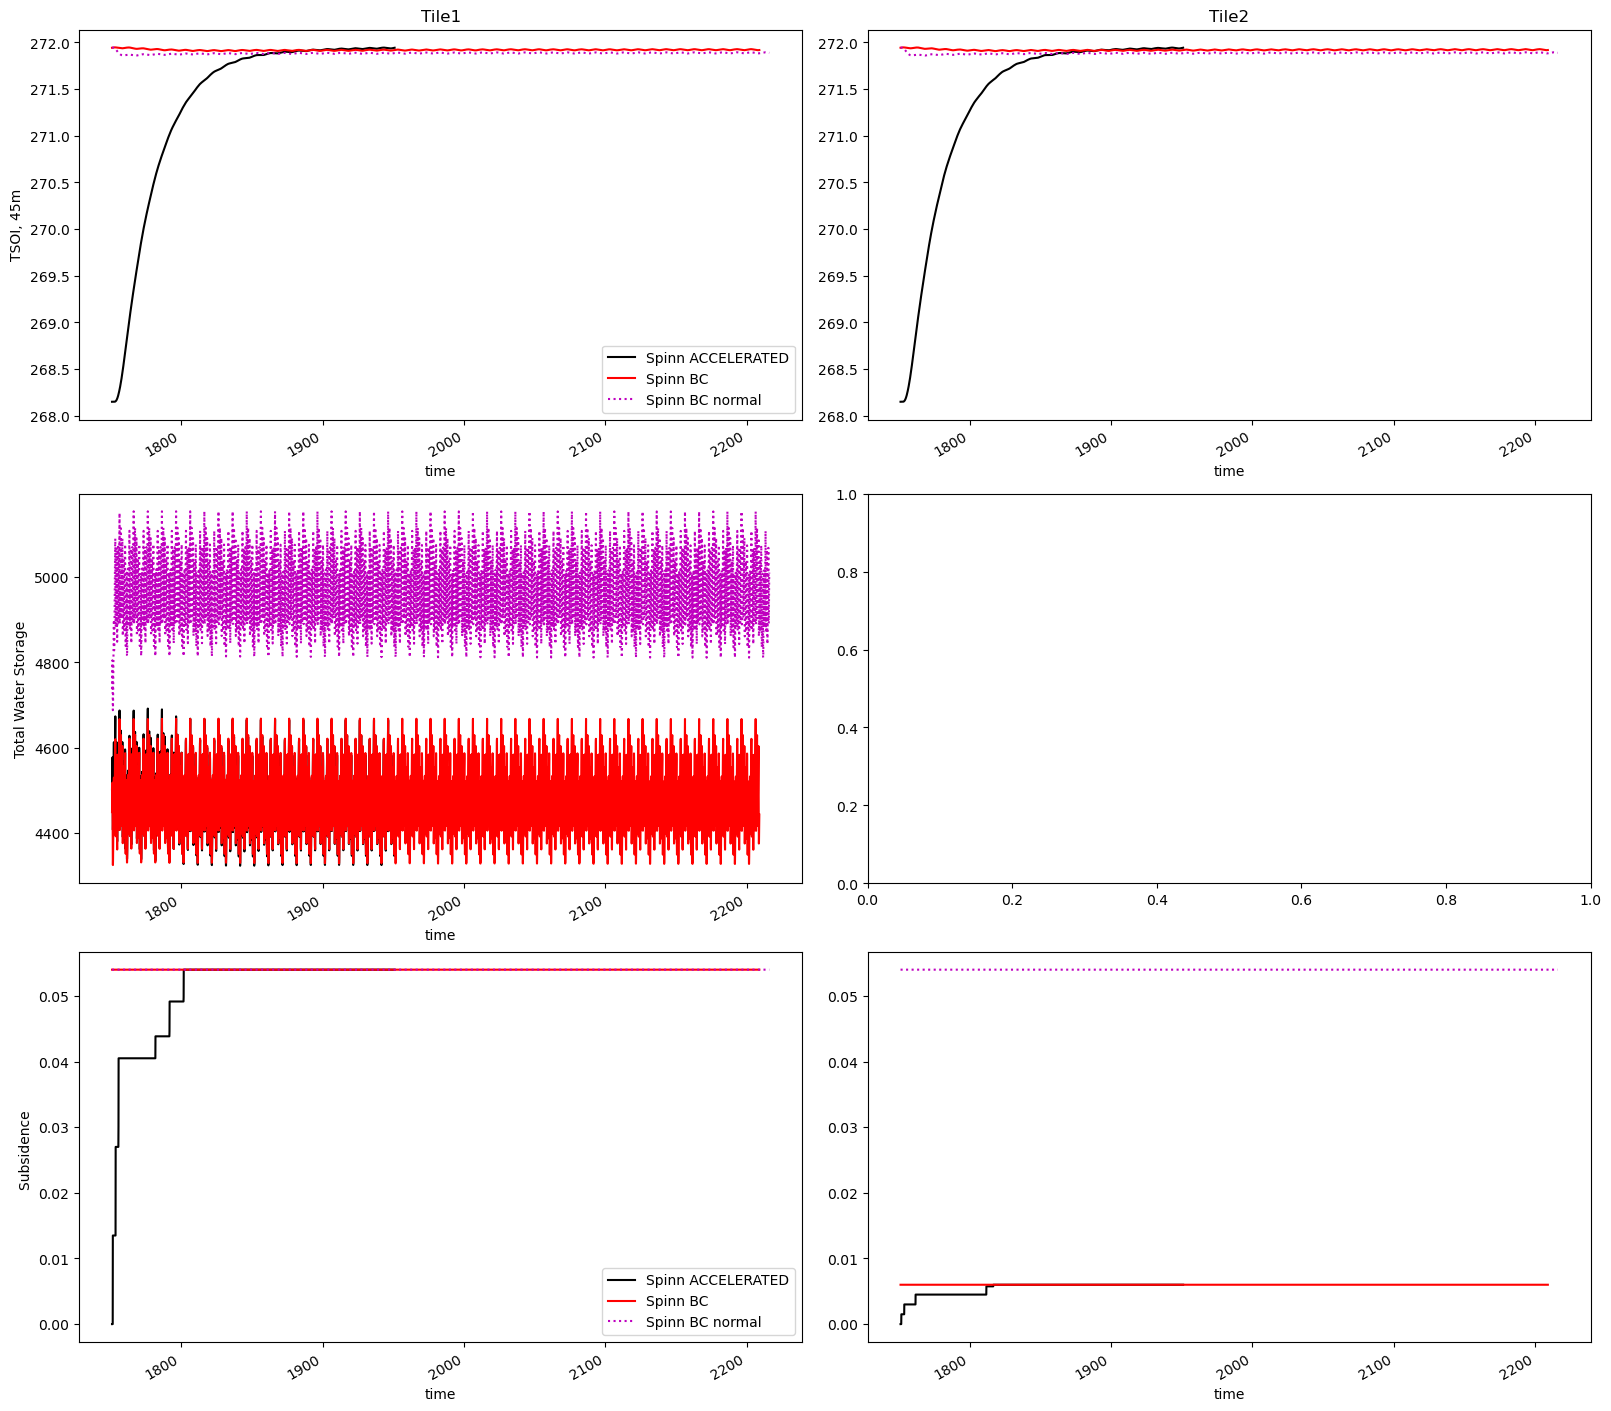

In [22]:
vars=[ "TSOI", "TWS","SUBSACC"]

fig, axs= plt.subplots(3,2, layout="constrained", figsize=(16,14))


ds_sp.TSOI[:,53,0].plot(x="time", ax=axs[0,0], color="black", label="Spinn ACCELERATED")
ds_sp.TSOI[:,53,1].plot(x="time", ax=axs[0,1], color="black")

ds_BC_new2.TSOI[:,53,0].plot(x="time", ax=axs[0,0], color="r", label="Spinn BC")
ds_BC_new2.TSOI[:,53,1].plot(x="time", ax=axs[0,1], color="r")
 
ds_BC_new.TSOI[:,53,0].plot(x="time", ax=axs[0,0], color="m", linestyle="dotted", label="Spinn BC normal")
ds_BC_new.TSOI[:,53,1].plot(x="time", ax=axs[0,1], color="m", linestyle="dotted")
axs[0,0].legend(loc=4)

##############################################################################
ds_sp[vars[1]][:,0].plot(color="black", x="time", ax= axs[1,0], label="Spinn ACCELERATED")
ds_BC_new2[vars[1]][:,0].plot(color="r", x="time", ax= axs[1,0], label="Spinn BC")#,linestyle="dotted")
ds_BC_new[vars[1]][:,0].plot(color="m", x="time", ax= axs[1,0],linestyle="dotted", label="Spinn BC normal")


##################################################################################

ds_sp[vars[2]][:,0].plot(color="black", x="time", ax= axs[2,0], label="Spinn ACCELERATED")
ds_sp[vars[2]][:,1].plot(color="black", x="time", ax= axs[2,1])#, linestyle="dotted")

ds_BC_new2[vars[2]][:,0].plot(color="r", x="time", ax= axs[2,0], label="Spinn BC")#,linestyle="dotted")
ds_BC_new2[vars[2]][:,1].plot(color="r", x="time", ax= axs[2,1],)#,linestyle="dotted")

ds_BC_new[vars[2]][:,0].plot(color="m", x="time", ax= axs[2,0],linestyle="dotted", label="Spinn BC normal")
ds_BC_new[vars[2]][:,1].plot(color="m", x="time", ax= axs[2,1],linestyle="dotted")

axs[2,0].legend(loc=4)

axs[0,0].set_ylabel("TSOI, 45m")
axs[2,0].set_ylabel("Subsidence ")

axs[1,0].set_ylabel("Total Water Storage")
axs[0,1].set_ylabel("")
axs[1,1].set_ylabel("")
axs[2,1].set_ylabel("")
axs[0,0].set_title("Tile1")
axs[0,1].set_title("Tile2")


plt.savefig("Plots/Spinnup1.pdf", bbox_inches='tight')



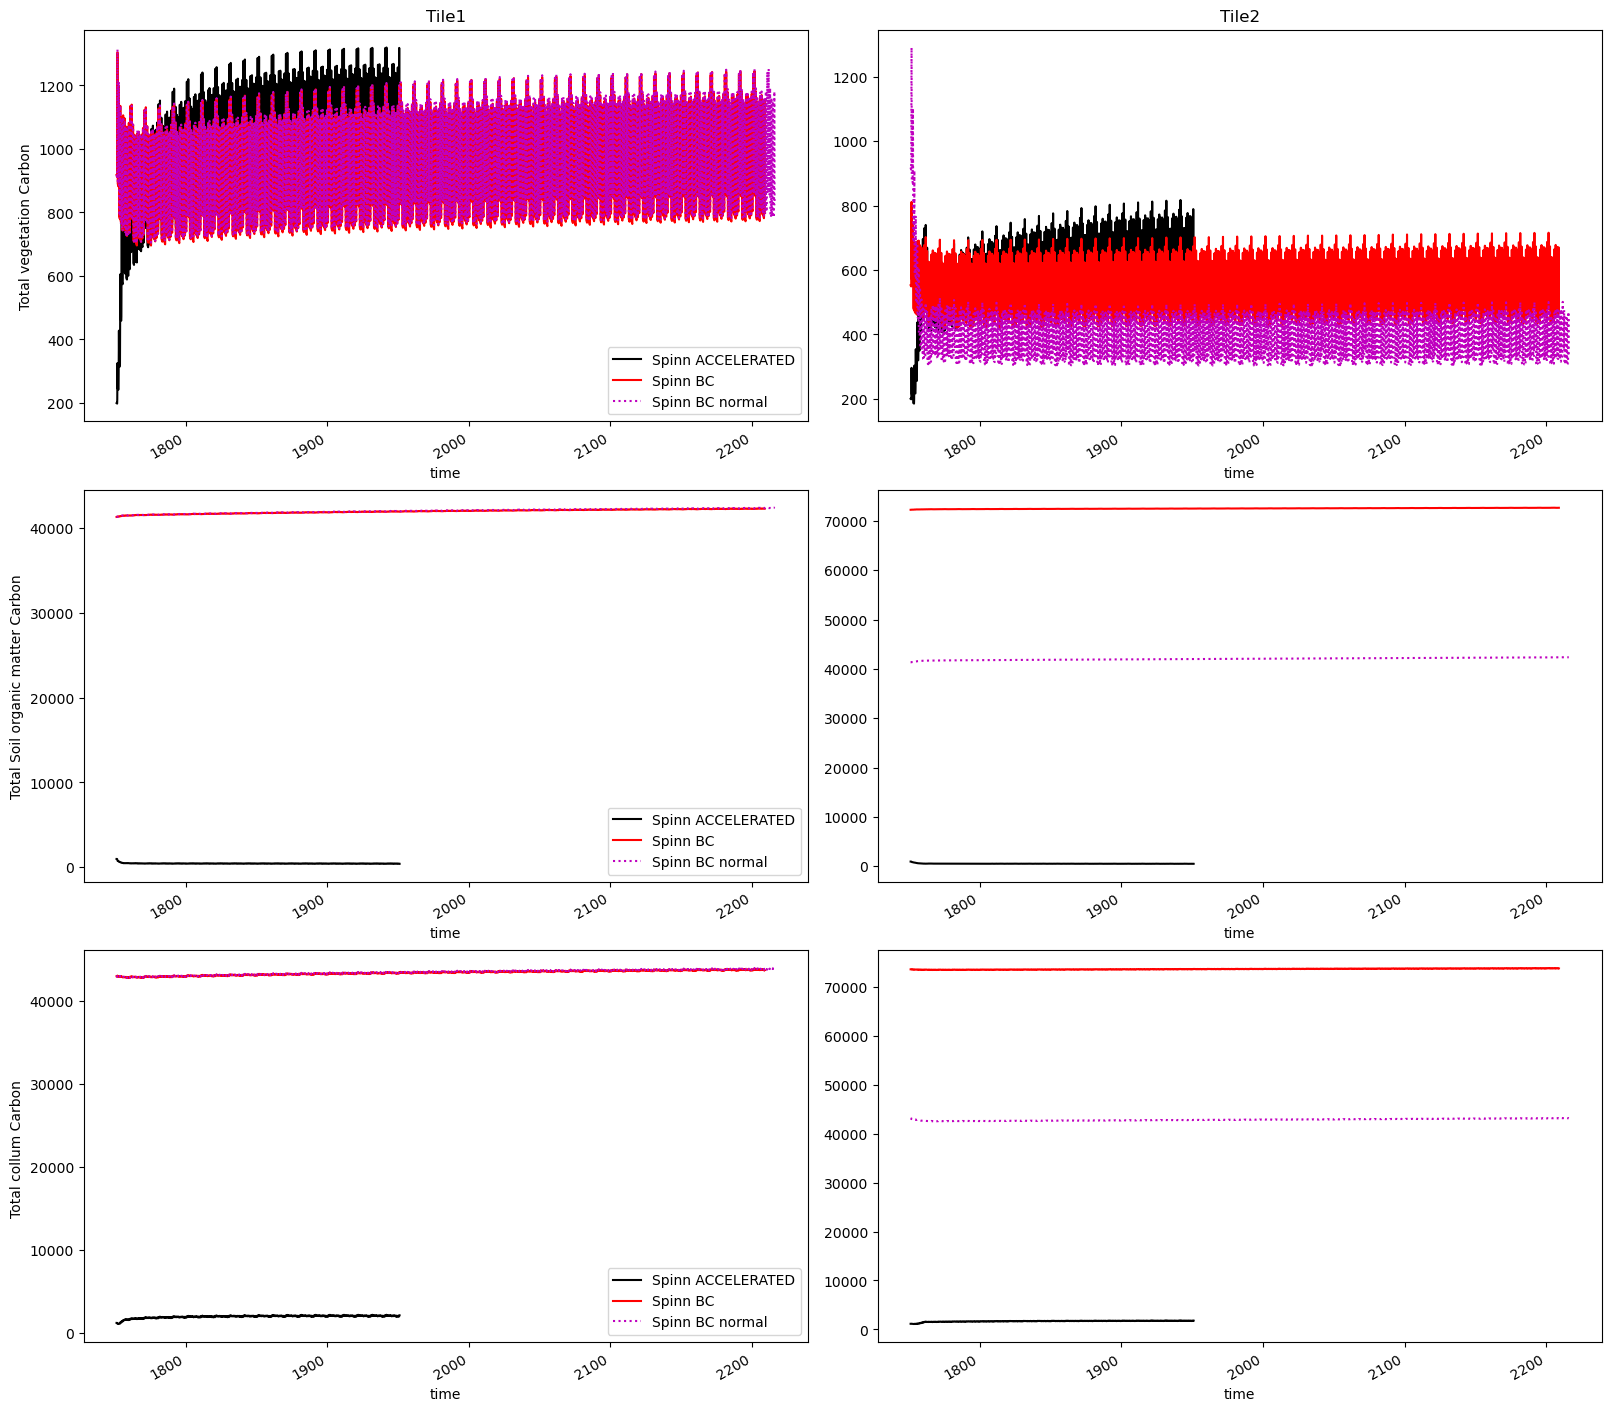

In [25]:
vars=[ "TOTVEGC", "TOTSOMC", "TOTCOLC"]

fig, axs= plt.subplots(3,2, layout="constrained", figsize=(16,14))


for i in range(0,3):
    
 ds_sp[vars[i]][:,0].plot(color="black", x="time", ax= axs[i,0], label="Spinn ACCELERATED")
 ds_sp[vars[i]][:,1].plot(color="black", x="time", ax= axs[i,1])
 
 ds_BC_new2[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="Spinn BC")
 ds_BC_new2[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1])
 
 ds_BC_new[vars[i]][:,0].plot(color="m", x="time", ax= axs[i,0], linestyle="dotted", label="Spinn BC normal")
 ds_BC_new[vars[i]][:,1].plot(color="m", x="time", ax= axs[i,1], linestyle="dotted")
 axs[i,0].legend(loc=4)
 axs[i,1].set_ylabel("")

axs[0,0].set_ylabel("Total vegetation Carbon")
axs[2,0].set_ylabel("Total collum Carbon ")

axs[1,0].set_ylabel("Total Soil organic matter Carbon")
axs[0,0].set_title("Tile1")
axs[0,1].set_title("Tile2")


plt.savefig("Plots/Spinnup2.pdf", bbox_inches='tight')

